In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 3 # figure size in inches

In [44]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [3]:
path1, path2 = 'https://stepik.org/media/attachments/lesson/385920/5_task_1.csv', 'https://stepik.org/media/attachments/lesson/385920/5_task_2.csv'

In [5]:
df1, df2 = pd.read_csv(path1), pd.read_csv(path2)

## Однофакторный ANOVA

In [6]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [17]:
df1a = df1[df1.group == 'A'].events

In [19]:
df1b = df1[df1.group == 'B'].events

In [20]:
df1c = df1[df1.group == 'C'].events

#### Гомогенны ли дисперсии групп?

In [22]:
sp.stats.levene(df1a,df1b,df1c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

#### Распределения в группах нормальные?

In [39]:
dframes, dsamples, shapiro_results = [df1a,df1b,df1c], [], []

In [40]:
for dframe in dframes:
    dsamples.append(dframe.sample(1000, random_state = 17))

In [41]:
for dsample in dsamples:
    shapiro_results.append(sp.stats.shapiro(dsample))

In [42]:
shapiro_results

[(0.9973153471946716, 0.09609563648700714),
 (0.9980798363685608, 0.31768906116485596),
 (0.9981185793876648, 0.3359004259109497)]

#### Значимы ли различия между группами?

In [103]:
sp.stats.f_oneway(df1a,df1b,df1c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

#### Между какими именно группами различия значимы?

In [45]:
print(pairwise_tukeyhsd(df1.events, df1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [47]:
for dframe in dframes:
    print(dframe.mean())

29.5796
37.6136
27.4703


## Многофакторный ANOVA

In [48]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [62]:
df2c = df2.loc[ df2['group'] == 'control', ['segment','events'] ]

In [63]:
df2t = df2.loc[ df2['group'] == 'test', ['segment','events'] ]

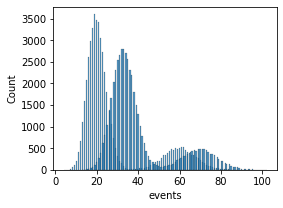

In [69]:
sns.histplot(df2c.events)
sns.histplot(df2t.events)

In [81]:
c_pvt = pd.pivot(df2c, columns = 'segment')

In [89]:
c_pvt.describe()

events              
segment          high           low
count    10000.000000  40000.000000
mean        59.970800     20.031575
std          7.805347      4.473576
min         31.000000      4.000000
25%         55.000000     17.000000
50%         60.000000     20.000000
75%         65.000000     23.000000
max         89.000000     41.000000

#### Гомогенны ли дисперсии?

In [90]:
sp.stats.levene(df2c.events,df2t.events)

LeveneResult(statistic=2.5440050816535327, pvalue=0.11071679229795423)

#### Какие факторы значимы по отдельности? Значимо ли их одновременное воздействие действие? Есть ли еще неучтённые факторы?

In [92]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'events ~ group + segment + group:segment'
model = ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [93]:
aov_table

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [96]:
df2['combination'] = df2.group + ' / ' + df2.segment

In [116]:
### print(pairwise_tukeyhsd(df2.events, df2.combination))

In [110]:
df2high = df2[df2.segment == 'high']
df2low = df2[df2.segment == 'low']

#### Значимость различий в сегменте 1

In [114]:
print(pairwise_tukeyhsd(df2high.events, df2high.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower   upper  reject
---------------------------------------------------
control   test   9.9677 0.001 9.7429 10.1925   True
---------------------------------------------------


#### Значимость различий в сегменте 2

In [115]:
print(pairwise_tukeyhsd(df2low.events, df2low.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
control   test  12.9944 0.001 12.9232 13.0655   True
----------------------------------------------------
